# Benchmark M3.1: Water flow in roots - Single root

by Daniel Leitner, Andrea Schnepf 

In this benchmark problem we consider a vertical single root segment surrounded by a static soil with constant soil matric potential.

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from van_genuchten import * 

## Theory
In this module, we consider water flow in xylem with the soil water potential considered static. The derivation of this problem is based on Roose and Fowler (2004) and Doussan et al. (2006).


The axial water flux in a xylem is given by 
\begin{eqnarray} 
q_z = - k_z \left( \frac{\partial \psi_r}{\partial z} - e_z \cdot v \right), \label{axialflux}
\end{eqnarray}
with units [cm$^3$ day$^{-1}$], see Eqn 3.1 Roose and Fowler, 2004. 
The parameter $k_z$ is the axial conductance [cm$^3$ day$^{-1}$], 
$\psi_r$ is the pressure inside the xylem [cm], 
$e_z$ the downward unit vector [1],
and $v$ the normed direction of the xylem [1]. Thus Eqn \ref{axialflux} can be expressed as
\begin{eqnarray}
q_z = - k_z \left( \frac{\partial \psi_r}{\partial z} + v_3 \right), \label{axialflux2}
\end{eqnarray}
where $v_3$ is the $z$-component of the normed xylem direction. 

The radial flux is given by 
\begin{eqnarray}
q_r = - 2 a \pi l k_r (\psi_s - \psi_r),
\end{eqnarray}
with units [cm$^3$ day$^{-1}$] (based on Eqn 3.3 Roose and Fowler, 2004), 
where $a$ is the root radius [cm], 
$l$ is the segments length [cm], 
$k_r$ is the radial conductance [day$^{-1}$], 
and $\psi_s$ is the soil matric potential of the surrounding soil [cm]. 

The net flux is given by
\begin{eqnarray}
q = q_z + q_r,
\end{eqnarray} 
and mass conservation yields
\begin{eqnarray}
2 a \pi k_r (\psi_s - \psi_r) = - k_z \frac{\partial^2 \psi_r}{\partial z^2} \label{masscons}
\end{eqnarray}
(see Eqn 3.4 Roose and Fowler, 2004).

### Analytical solution

For constant $k_r$ and $k_z$ we can solve Eqn \ref{masscons} yielding 
\begin{eqnarray}
\psi_r(z) := \psi_s + d_1 e^{\sqrt{c} z } + d_2 e^{-\sqrt{c} z} \label{analytic_flux}
\end{eqnarray} 
with $c = 2 a \pi k_r / k_z$. 

In the following the constants $d_1$, and $d_2$ [cm] are calculated from the boundary conditions.
The Dirichlet boundary conditions at the top $\psi_r(0) =\psi_0$ is inserted into the analytic solution Eqn \ref{analytic_flux}, and yields
\begin{eqnarray}
\psi_s + d_1  + d_2  = \psi_0.
\end{eqnarray}

The Neumann boundary conition $q_z(L) = 0$ (Eqn \ref{axialflux2}) leads to 
\begin{eqnarray}
\frac{\partial \psi_r}{\partial z} (L) = v_3.
\end{eqnarray}
Using the derivation of the analytical solution yields
\begin{eqnarray}
d_1 \sqrt{c} e^{\sqrt{c} L } - d_2 \sqrt{c} e^{-\sqrt{c} L}  = v_3.
\end{eqnarray}


For a straight segment $v_3 = -1$. Therefore, we solve 
\begin{align}
\left(\begin{array}{cc}
  1 & 1  \\
 \sqrt{c} \exp{(\sqrt{c} L)} & -\sqrt{c} \exp{(-\sqrt{c} L)} \\
\end{array}\right)
\left(\begin{array}{c}
  d_{1}  \\
  d_{2}  \\
\end{array}\right)
{} &= 
\left(\begin{array}{c}  
  \psi_0-\psi_s \\
  -1 \\
\end{array}\right)
\end{align}

Solving for the constants $d_1$, and $d_2$, yields the analytical solution.

## Description of benchmark M3.1

The parameters of the single root benchmark are given by

In [3]:
L = 50            # length of single straight root [cm]
a = 0.2           # root radius  [cm]
kx = 0.0432       # root axial conductivity [cm^3 / day] 
kr = 1.73e-4      # root radial conductivity [1 / day]
p_s = -200        # soil matric potiential [cm]
p0 = -1000        # dirichlet bc at root collar [cm]

The analytical solution is obtained by solving Eqn 10.

potential at the root collar -1000.0 cm
potential at the root tip -27957.1383016587 cm
mean potential -7800.212543898868 cm


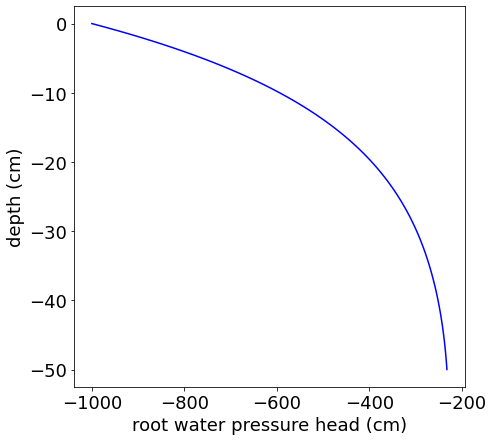

In [4]:
c = 2*a*np.pi*kr/kx
p_r = lambda z: p_s + d[0]*np.exp(np.sqrt(c)*z) + d[1]*np.exp(-np.sqrt(c)*z) # Eqn 6

# Boundary conditions
AA = np.array([[1,1], [np.sqrt(c)*np.exp(np.sqrt(c)*(-L)), -np.sqrt(c)*np.exp(-np.sqrt(c)*(-L))] ]) 
bb = np.array([p0-p_s, -1]) 
d = np.linalg.solve(AA, bb) # Eqn 10

# Print results
print("potential at the root collar", p_r(0), "cm")
print("potential at the root tip", p_r(L), "cm")
mean_p = (np.exp(-np.sqrt(c) * L) * (np.exp(np.sqrt(c) * L) - 1) * (d[0] * np.exp(np.sqrt(c) * L) + d[1])) / np.sqrt(c) + L * p_s
print("mean potential", mean_p/L, "cm")

# Plot results
fig=plt.figure(figsize=(7, 7))
za_ = np.linspace(0, -L, 100)
pr = list(map(p_r, za_))
plt.plot(pr,za_,'b')
plt.xlabel("root water pressure head (cm)")
plt.ylabel("depth (cm)")
plt.show()

## References

Doussan, C., Pierret, A., Garrigues, E., and Pages, L. (2006). Water uptake by plant roots: II - Modelling of water transfer in the soil root-system with explicit account of flow within the root system - comparison with experiments. *Plant and Soil*, 283(1-2):99–117.

Roose, T. and Fowler, A. C. (2004). A model for water uptake by plant roots. *Journal of Theoretical Biology*, 228(2):155–171.